In [1]:
from scipy import stats
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import Image

# PROBABILITY DISTRIBUTIONS  & RANDOM NUMBERS

## Sample mean and variance of given data 

In [17]:
data= [1.7954749844952811, -0.82344065038249903, -0.2192039195121927, 0.43421078851339012, -1.3937260553671886, 0.85161210073274862, -2.6686243950360145, -0.35207951288551514, -0.10940076133160911, -0.59905215298171999, -1.9077435365842492, 0.020406556867819687, -1.2667957796625413, -0.89430991460718678, 1.8038278417226581, 0.22364484431918985, 0.24387840765089427, 0.16074727588740503, -0.60364894979460193, 0.88708395065341128, 0.59160454172753119, 0.69199479160946198, 1.0520703481037412, 0.50795459134774568, 1.5768791411906093, 0.11136128559501068, 0.96834991062732267, -1.0799223246865801, -0.77406582026005244, -0.30040067363629003, 1.2377561077782491, -0.99824929203421076, -0.02168098535073721, -1.0387804686170952, -0.58153332350166953, -0.88398216313031486, 0.98199801462526692, -0.65395591277809428, 1.188250840837731, 0.058226502477458669, 0.96105869074830363, 0.10567619147859778, 0.51881996330412861, -1.707076404292295, 0.18157283917332023, -0.33912688245307337, 1.2734418824757954, -0.51695460401269733, -0.20360790850843452, 0.31856140595590027, 0.75735145577200225, 3.0430689558832995, 0.47146356276179396, 1.1383428598945147, 1.7429250016207152, -1.2014904270011244, 0.56068261948182707, 1.4736754494886215, 0.30054000076482723, 0.46517586287895907, -0.18897799002118684, -0.21664647047151026, 0.65038476271826817, -1.2619505543431326, 0.06505573549326088, 0.69393228967205012, -1.9606057368685155, -0.56673063268424828, -0.068754682043091431, -0.30525992662681395, -2.1195784329855063, -0.14774360361720879, 0.83612496345549592, -0.59503981572338716, -0.99505845969486162, 0.48399819526397336, 0.50755656012655292, -0.3764647961265693, -0.036037664799445097, -1.0056478038593424, -0.32747779322900994, 0.25654288021891763, -0.76614113585673627, -0.63801666019907732, 1.9661880283890789, -0.66627731259491163, -0.90671980413027353, -2.9151271617469758, 1.1026698881419355, 0.29541153460103858, 2.2523317145660862, -0.93489202353580836, 0.22350292567728611, 2.433675833153746, -1.8417520331375354, 0.90279416703884552, 1.0431742286998438, 0.68114918105219224, 0.76849076134294891, 0.4715201798721444]

In [20]:
print('data length =',len(data))

data length = 100


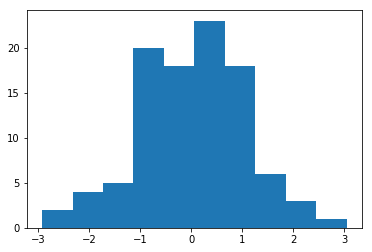

In [28]:
plt.hist(data,bins=10)
plt.show()

In [21]:
print('sample mean =',np.mean(data))
print('sample standard deviation =',np.std(data))

sample mean = 0.0435444008523
sample standard deviation = 1.06960666814


## Some properties of popular distributions

### a) Gaussian

$$
x\sim {\cal N}(\mu,\sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\} 
$$

In [38]:
f = lambda x:stats.norm.pdf(x,0,1)

**TODO**: verify normalisation 

**TODO**: get the expectation value          

**TODO**: get the variance

### b) Bernoulli
$$
k\sim {\rm Bern}(p) = p^k (1-p)^{1-k}
$$

In [61]:
P = lambda k: stats.bernoulli.pmf(k,0.3)

### c) generalised Bernoulli
$$
m\mapsto {\bf t} \sim {\rm gBern}({\bf p}) = \prod_{k=1}^K p_k^{t_k} 
$$
where the common procedure is to map the multiclass variable $m$ in a vector variable ${\bf t}$
according to the "1-to-K" coding scheme

In [576]:
K=3  # number of classes
p_1 = 0.2
p_2 = 0.5
p_3 = 1 - p_1 - p_2
p = [p_1,p_2,p_3]
gBern = lambda t,p: np.prod(np.array(p)**t)    

In [75]:
# 1-to-K coding scheme
gBern([0,0,1],p)

0.30000000000000004

In [93]:
# expected value, E[t|p]
terms=[]
for i in range(len(p)):
    t1=max(0,1-i)
    t2=min(i,2-i)
    t3=1-t1-t2
    t=np.array([t1,t2,t3])
    terms.append(gBern(t,p)*t[i])
print(terms)

[0.20000000000000001, 0.5, 0.30000000000000004]


## Random numbers following a given distribution